In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import plotly.figure_factory as ff


import plotly.express as px


### Datos Shapefile (Ubicacion geoespacial de los municipios y Departamentos)

In [2]:
# Cargar el shapefile de departamentos de Colombia
colombia_shapefile = r"C:\Users\Juan Gutierrez\Downloads\MGN2023_DPTO_POLITICO\MGN_ADM_DPTO_POLITICO.shp"
dep = gpd.read_file(colombia_shapefile)

# Municipios
municipios_shapefile = r"C:\Users\Juan Gutierrez\Downloads\MGN2018_MPIO_POLITICO\MGN_MPIO_POLITICO.shp"

mun = gpd.read_file(municipios_shapefile)


### Data de Evaluación Agrícola

In [3]:
ubicacion = r"C:\Users\Juan Gutierrez\OneDrive\Escritorio\Análisis de Datos\BootCamp\Proyecto Análisis de Datos\Visualización\DataEVA.csv"

data = pd.read_csv(ubicacion)

data['llave'] = data['Codigo depto'].astype(str)+data['Codigo mpio'].astype(str)

In [4]:
departamento = ['BOLÍVAR','CÓRDOBA']


dep1 = dep[dep['dpto_cnmbr'].isin(departamento)] #Departamentos

mun1 = mun[mun['DPTO_CNMBR'].isin(departamento)] #Municipios

mun1['llave'] = mun1['DPTO_CCDGO'].astype(str)+mun1['MPIO_CCNCT'].astype(str)


### Unir base EVA con Ubicacione Geoespacial de municipios y Departamentos

In [5]:
datos_unidos = data.merge(mun1, on='llave', how='inner')  # Puedes cambiar 'outer' por 'inner', 'left', o 'right' según tus necesidades

In [6]:
# Eliminar duplicados en mun1 basados en la llave
mun1 = mun1.drop_duplicates(subset='llave')

# Realizar la unión nuevamente
datos_unidos = data.merge(mun1, on='llave', how='inner')

# Verificar el número de filas después de la unión
print(f"Número de filas después de la unión: {datos_unidos.shape[0]}")

Número de filas después de la unión: 16354


In [7]:
datos_unidos.drop(columns=['llave','Unnamed: 0'], inplace=True)

In [8]:
datos_unidos.shape

(16354, 26)

In [9]:
gdf = gpd.GeoDataFrame(datos_unidos, geometry='geometry')

gdf = gdf[gdf['Area sembrada'] > 0]

In [10]:
gdf.shape

(16149, 26)

In [11]:
gdf.to_file('mapa.shp')

C:\Users\Juan Gutierrez\AppData\Local\Temp\ipykernel_13892\2493723900.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('mapa.shp')
c:\Users\Juan Gutierrez\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Codigo depto' to 'Codigo dep'
  ogr_write(
c:\Users\Juan Gutierrez\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Codigo mpio' to 'Codigo mpi'
  ogr_write(
c:\Users\Juan Gutierrez\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Departamento' to 'Departamen'
  ogr_write(
c:\Users\Juan Gutierrez\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Grupo cultivo' to 'Grupo cult'
  ogr_write(
c:\Users\Juan Guti

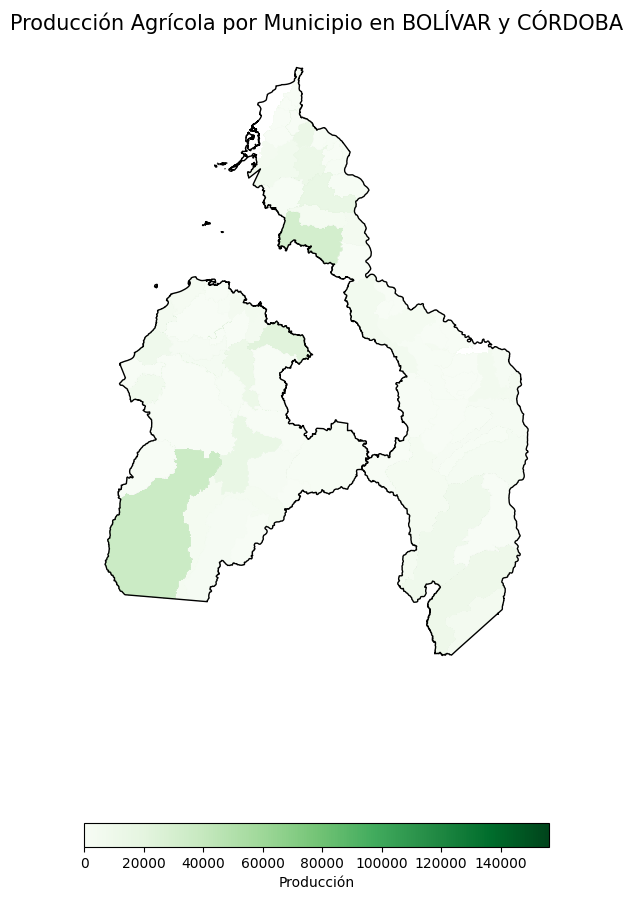

In [12]:
# Crear un mapa base
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plotear los departamentos
dep1.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plotear los municipios con la variable de producción
gdf.plot(column='Produccion', ax=ax, legend=True, cmap='Greens', 
        legend_kwds={'label': "Producción", 'orientation': "horizontal", 'shrink': 0.5})

# Añadir título
plt.title('Producción Agrícola por Municipio en BOLÍVAR y CÓRDOBA', fontsize=15)

# Quitar los ejes de latitud y longitud
ax.set_axis_off()

# Añadir una cuadrícula
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Mostrar el mapa
plt.show()







In [13]:
paletas_colores = [
    'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 
    'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 
    'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
]